In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-mask-dataset


In [2]:
import os

path = "/kaggle/input/face-mask-dataset"

contents = os.listdir(path)

for item in contents:
  print(item)

data


In [3]:
path = "/kaggle/input/face-mask-dataset/data"
contents = os.listdir(path)

for item in contents:
  print(item)

without_mask
with_mask


In [4]:
without_mask_path = "/kaggle/input/face-mask-dataset/data/without_mask"
with_mask_path = "/kaggle/input/face-mask-dataset/data/with_mask"

print("Path for without_mask folder:", without_mask_path)
print("Path for with_mask folder:", with_mask_path)

Path for without_mask folder: /kaggle/input/face-mask-dataset/data/without_mask
Path for with_mask folder: /kaggle/input/face-mask-dataset/data/with_mask


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

In [7]:
with_mask_files[:5], without_mask_files[:5]

(['with_mask_3326.jpg',
  'with_mask_3139.jpg',
  'with_mask_696.jpg',
  'with_mask_2867.jpg',
  'with_mask_39.jpg'],
 ['without_mask_3248.jpg',
  'without_mask_2803.jpg',
  'without_mask_650.jpg',
  'without_mask_2060.jpg',
  'without_mask_559.jpg'])

In [8]:
len(with_mask_files), len(without_mask_files)

(3725, 3828)

NO CLASS IMBALANCE

**CREATING CLASS LABELS**

1 FOR WITH MASKS


0 FOR WITHOUT MASKS

In [9]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [10]:
with_mask_labels[:5], without_mask_labels[:5]

([1, 1, 1, 1, 1], [0, 0, 0, 0, 0])

In [11]:
labels = with_mask_labels + without_mask_labels
len(labels)

7553

## **DATA VISUALIZATION**

array([[[ 50,  35,  42],
        [ 54,  39,  44],
        [ 61,  46,  51],
        ...,
        [147, 159, 119],
        [160, 172, 132],
        [175, 188, 145]],

       [[ 50,  35,  42],
        [ 54,  39,  44],
        [ 62,  47,  50],
        ...,
        [155, 167, 127],
        [166, 179, 136],
        [177, 190, 147]],

       [[ 51,  36,  43],
        [ 55,  40,  45],
        [ 62,  47,  50],
        ...,
        [168, 180, 140],
        [175, 188, 145],
        [182, 195, 152]],

       ...,

       [[210, 202, 156],
        [210, 202, 156],
        [213, 202, 156],
        ...,
        [ 82, 108, 157],
        [ 82, 108, 157],
        [ 81, 107, 156]],

       [[204, 196, 150],
        [205, 197, 151],
        [208, 197, 151],
        ...,
        [ 82, 110, 158],
        [ 77, 105, 153],
        [ 77, 105, 153]],

       [[204, 196, 150],
        [205, 197, 151],
        [208, 197, 151],
        ...,
        [ 82, 110, 158],
        [ 77, 105, 153],
        [ 77, 105, 153]]], dtype=uint8)
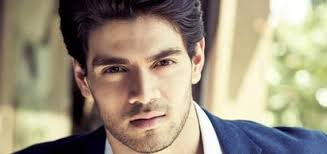

In [12]:
mpimg.imread(without_mask_path + "/" + without_mask_files[7])

array([[[ 96,  93,  76],
        [ 96,  93,  76],
        [ 95,  92,  75],
        ...,
        [141, 134, 118],
        [140, 133, 117],
        [139, 132, 116]],

       [[ 95,  92,  75],
        [ 95,  92,  75],
        [ 94,  91,  74],
        ...,
        [141, 134, 118],
        [141, 134, 118],
        [140, 133, 117]],

       [[ 93,  90,  73],
        [ 93,  90,  73],
        [ 93,  90,  73],
        ...,
        [142, 135, 119],
        [141, 134, 118],
        [140, 133, 117]],

       ...,

       [[ 40,  40,  28],
        [ 40,  40,  28],
        [ 39,  39,  27],
        ...,
        [134, 123, 105],
        [142, 131, 113],
        [147, 136, 118]],

       [[ 39,  39,  27],
        [ 38,  38,  26],
        [ 38,  38,  26],
        ...,
        [130, 119, 101],
        [141, 130, 112],
        [146, 135, 117]],

       [[ 37,  37,  25],
        [ 37,  37,  25],
        [ 38,  38,  26],
        ...,
        [125, 114,  96],
        [137, 126, 108],
        [143, 132, 114]]], dtype=uint8)
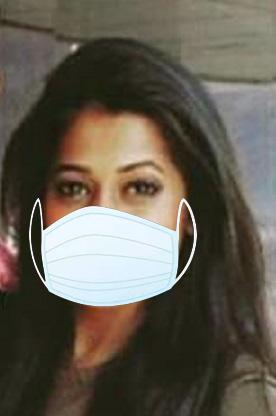

In [13]:
mpimg.imread(with_mask_path + "/" + with_mask_files[7])

# **IMAGE PROCESSING**

In [14]:
data = []

for img_path in with_mask_files:
  img = cv2.imread(with_mask_path + "/" + img_path)
  img = cv2.resize(img, (224, 224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  data.append(img)

for img_path in without_mask_files:
  img = cv2.imread(without_mask_path + "/" + img_path)
  img = cv2.resize(img, (224, 224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  data.append(img)

In [15]:
len(data), type(data)

(7553, list)

array([[[ 95,  92,  75],
        [ 95,  92,  75],
        [ 93,  90,  73],
        ...,
        [142, 134, 118],
        [140, 133, 118],
        [139, 132, 116]],

       [[ 92,  89,  72],
        [ 92,  89,  72],
        [ 91,  88,  71],
        ...,
        [143, 135, 120],
        [141, 134, 119],
        [140, 133, 117]],

       [[ 86,  83,  67],
        [ 88,  85,  68],
        [ 88,  85,  68],
        ...,
        [145, 136, 121],
        [143, 136, 120],
        [142, 135, 119]],

       ...,

       [[ 42,  42,  30],
        [ 41,  41,  29],
        [ 40,  40,  28],
        ...,
        [136, 125, 107],
        [139, 128, 110],
        [142, 131, 113]],

       [[ 40,  40,  28],
        [ 40,  40,  28],
        [ 39,  39,  27],
        ...,
        [130, 119, 101],
        [139, 128, 110],
        [146, 134, 116]],

       [[ 38,  38,  26],
        [ 38,  38,  25],
        [ 38,  38,  26],
        ...,
        [122, 111,  93],
        [135, 124, 106],
        [144, 133, 114]]], dtype=uint8)
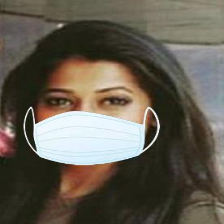

In [16]:
data[7]

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[7].shape

(224, 224, 3)

In [19]:
X = np.array(data)
y = np.array(labels)

In [20]:
X.shape, y.shape

((7553, 224, 224, 3), (7553,))

# **MODEL BUILDING**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6042, 224, 224, 3), (1511, 224, 224, 3), (6042,), (1511,))

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define generators
datagen = ImageDataGenerator(rescale=1./255)

# Use .flow() for NumPy arrays
train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)


In [25]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,915,713 (91.23 MB)

 Trainable params: 23,915,713 (91.23 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - acc: 0.7220 - loss: 0.6792 - val_acc: 0.8776 - val_loss: 0.2686
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - acc: 0.8729 - loss: 0.3111 - val_acc: 0.8974 - val_loss: 0.2395
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - acc: 0.9119 - loss: 0.2345 - val_acc: 0.9001 - val_loss: 0.2264
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - acc: 0.9183 - loss: 0.2175 - val_acc: 0.9126 - val_loss: 0.2442
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - acc: 0.9274 - loss: 0.1968 - val_acc: 0.9040 - val_loss: 0.2833
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - acc: 0.9542 - loss: 0.1354 - val_acc: 0.9259 - val_loss: 0.1895
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - acc: 0.9512 - loss: 0.1331 - val_acc: 0.9358 - val_loss: 0.2003
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - acc: 0.9562 - loss: 0.1170 - val_acc: 0.9298 - val_loss: 0.2159
Epoch 9/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step 

In [29]:
#give me the evaluation metrics

In [30]:
loss, accuracy = model.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9290 - loss: 0.1866
Test Loss: 0.189496710896492
Test Accuracy: 0.9258769154548645


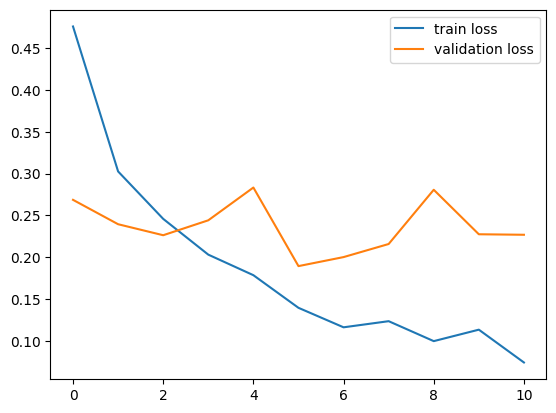

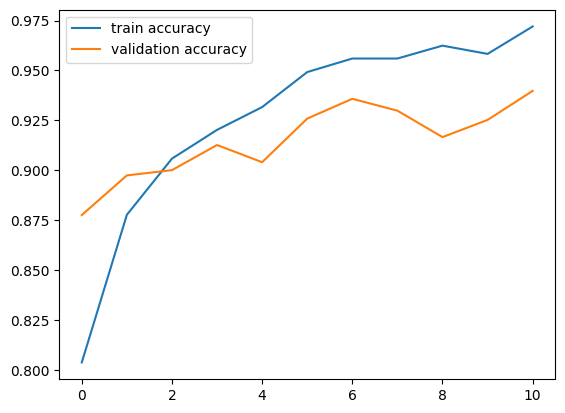

In [31]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(test_generator)

y_pred = (y_pred_probs > 0.5).astype(int).flatten()

y_true = test_generator.y

print(classification_report(y_true, y_pred, target_names=['class0', 'class1']))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
              precision    recall  f1-score   support

      class0       0.95      0.90      0.92       750
      class1       0.91      0.95      0.93       761

    accuracy                           0.93      1511
   macro avg       0.93      0.93      0.93      1511
weighted avg       0.93      0.93      0.93      1511



In [38]:
confusion_matrix(y_pred, y_test)

array([[674,  36],
       [ 76, 725]])

In [32]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

input_image_resized = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


if input_prediction > 0.5:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

KeyboardInterrupt: Interrupted by user